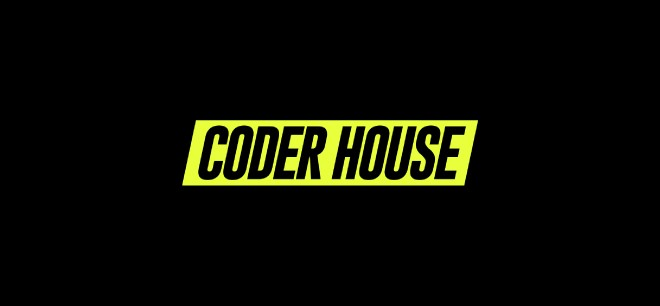

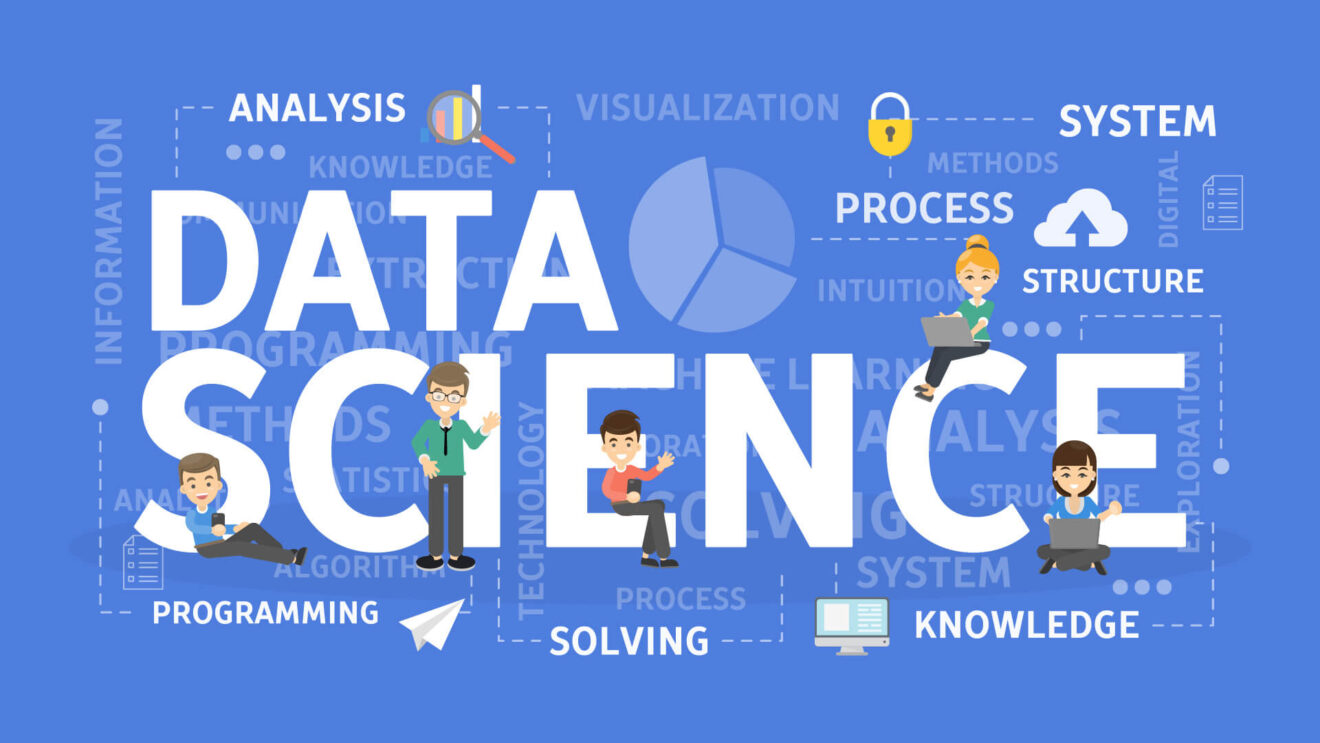


# **Alumno: Joaquín Millan Lanhozo**

# **Profesor: Marco Rojo**
# **Tutor: Fernando Trujillo Arévalo**

###***COMISION 29795***



1.   Tema de investigación
2.   Planteamiento del problema
2.   Objetivo general
2.   Objetivo específico
2.   Hipótesis
2.   Preguntas de investigación
2.   Fuente de los datos
2.   Primer vistazo a la base de datos
2.   Descripción de variables
2.   Limpieza de datos
2.   Análisis exploratorio
2.   Módelo de Machine Learning

  12.1 Random Forest

  12.2 SVM
2.   Evaluación del módelo
2.   Mejora del módelo




# 1. Tema de investigación


El tema de investigación estará enfocado para entidades financieras, bancos, cajas de compensación y entidades comerciales, entidades que ofrezcan depósitos a sus usuarios. La investigación se basa en poder desarrollar un modelo acorde y a medida para que dichas entidades puedan aprovechar el uso de sus datos y el valor que tienen estos datos.

Este dataset tiene información de un banco, data relacionada con la campaña de marketing con datos de las edades de personas contactadas, su trabajo, su estado civil, su educación, su balance, entre otros.

Con este dataset y toda su información, armaremos un modelo en donde podremos  ejecutar una campaña acorde para poder conseguir nuevos clientes  y poder salir a buscar nuestro potencial cliente "ideal". Ver que cliente el modelo puede predecir y en que medida la suscripción a un deposito a termino.

Buscaremos clarificar los factores que afectan a la campaña de marketing para poder lograr hacer campañas mas efectivas y poder predecir resultados de dichas campañas.

También nos sirve para conocer al publico del banco, para saber como suele comportarse el cliente en relación a los servicios y poder entender patrones y/o características que definan a nuestros clientes para luego poder tomar decisiones acertadas en base a la información con la que contamos.




# 2. Planteamiento del problema

Nos encontramos con el problema de que no conocemos a nuestros clientes y no sabriámos a quien ofrecer nuestros servicios. 

Es por ello que nos encontramos con la necesidad de querer desarrollar nuestra área de Data Science con el fin de poder ofrecer mejores servicios y de una manera más efectiva. Es por ello que necesitamos, y tenemos la necesidad de preveer quienes y como son nuestros clientes "ideales", para luego ir a buscarlos de manera efectiva y eficiente. 

Deseamos conocer los segmentos a los cuales englobaremos a nuestro target de clientes, para poder identificar el perfil y poder desarrollar una campaña acorde, para poder segmentar y predecir si dicho cliente es propenso o no a la suscripcion a un deposito.

#   3. Objetivo general


*   Poder desarrollar un módelo de predicción preciso que pueda predecir si un cliente va a suscribirse o no a un deposito a plazo.

*   Detectar patrones en los grupos a estudiar a fin de posteriormente lanzar campañas de marketing mas precisas y efectivas.

*   Segmentar y conocer a nuestro cliente ideal, a quien deberíamos ofrecerle un préstamo.



# 4. Objetivo específico



*   Armar un modelo de clasificación, en donde me recomiende o no, si un potencial cliente es apto para nuestros servicios.
*   Armar un análisis para poder tomar insights de nuestros clientes.
*   Entrenar dichos modelos y perfeccionarlos.



# 5. Hipotésis




-	Se cree que las personas con mayor edad, casadas, con dependientes económicos, mayor nivel educativo son los mayores clientes potenciales a solicitar un crédito para hacer un gasto fuerte.
-	Se cree que las personas con mayor balance, y por ende con mas capacidad de ahorro son clientes potenciales para la suscripción de un deposito a plazo.

# 6. Preguntas de investigación



*   ¿Que edades tienen las personas que suelen adquirir nuestros servicios?
*   ¿Para que usan nuestros servicios?
*   ¿A que se dedican estas personas?
*   ¿Cuál es su estado civil?
*   ¿Que educación tienen estas personas?
*   ¿Cuál sería mi cliente ideal?
*   ¿Cuál sería mi cliente no ideal?
*   ¿Qué tipo de persona solicita nuestros prestamos?
*   ¿Qué afecta y es mas relevante a la hora de sacar un depósito a plazo?
*   ¿Cuando, como y a quien deberia ofrecer el depósito?



# 7. Fuente de los datos

Nuestra base de datos es de Kaggle y se puede encontrar en el siguiente link: (https://www.kaggle.com/datasets/janiobachmann/bank-marketing-dataset?resource=download).

#-----------------------------------------------------------------------------------------------------------------------------------------

---



# 8. Primer vistazo a la base de datos

In [ ]:
# Importo y conecto el google drive, en donde se encuentra el dataset. 
from google.colab import drive
import os
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Importo pandas y numpy
import pandas as pd
import numpy as np
# Importo las  librerias de visualizacion
import matplotlib.pyplot as plt
import seaborn as sns
# Importo librerias para el modelado
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix


In [ ]:
# Hago un dataframe con la informacion y leo el archivo con data. Hago un head para ver los primeros 5 datos del dataframe como para ver de que trata la informacion que tenemos.
df= pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/bank-v1.csv',sep=',')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
# Información del tipo de dato y sus columnas, nuevamente nos demuestra que no hay datos nulos.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [ ]:
# Los valores únicos que tenemos por columna
df.nunique()


age            76
job            12
marital         3
education       4
default         2
balance      3805
housing         2
loan            2
contact         3
day            31
month          12
duration     1428
campaign       36
pdays         472
previous       34
poutcome        4
deposit         2
dtype: int64

In [ ]:
# Los encabezados de información que contamos (Las variables).
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [ ]:
# Descripción de las variables numéricas del Dataset.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,11162.0,41.231948,11.913369,18.0,32.0,39.0,49.00,95.0
balance,11162.0,1528.538524,3225.413326,-6847.0,122.0,550.0,1708.00,81204.0
day,11162.0,15.658036,8.420740,1.0,8.0,15.0,22.00,31.0
duration,11162.0,371.993818,347.128386,2.0,138.0,255.0,496.00,3881.0
campaign,11162.0,2.508421,2.722077,1.0,1.0,2.0,3.00,63.0
pdays,11162.0,51.330407,108.758282,-1.0,-1.0,-1.0,20.75,854.0
previous,11162.0,0.832557,2.292007,0.0,0.0,0.0,1.00,58.0


El  método describe nos da cierta informacion de las variables numéricas:



*   Age --> Promedio de edad en 41 años, la gran mayoria de los datos son personas con edades de entre 32 y 49 años.
*   Balance --> Nos da una media de balance no muy alta, la gran mayoria de los balances estan por debajo de los 1708 USD. Es la variable que mayor dispersión posee.
*   Duración --> Vemos que la duración promedio de cada contacto son de 6 minutos por contacto.
*   Campaign -->Vemos que por lo general la gente es contactada no más de 3 veces.



# 9. Descripción de variables



1.   "age"--> Edad de la persona encuestada.
2.   "job"--> Profesión de la persona.
2.   "marital"--> Estado civil.
2.   "education"--> Mayor grado de educación obtenido por la persona.
2.   "default"--> Tiene crédito en default? 
2.   "balance"--> Balance de la persona en dólares.
2.   "housing"--> variable binaria que evaluá si el cliente esta en una plan de hipotecas.
2.   "loan"--> Variable binaria que dicta si el usuario tiene un préstamo o no.
2.   "contact"--> Tipo de contacto al cliente.
2.   "day"--> dia en el que fue realizada la última encuesta/ tomado el prestamo.
2.   "month"--> mes en el que fue realizada la última encuesta/ tomado el prestamo.
2.   "duration"--> Duración en segundos del último contacto.
2.   "campaign"--> Número de veces que el cliente fue contactado.
2.   "pdays"--> Dias que pasaron desde su último contacto (999 - no hubo contacto previo).
2.   "previous"--> Contactos realizados previamente.
2.   "poutcome"--> Resultado de la anterior campaña de Marketing.
2.   "deposit"-->  Variable binaria, ¿se sucribío a algun depósito?



#-----------------------------------------------------------------------------------------------------------------------------------------

---


# 10. Limpieza de los datos

In [ ]:
# Reviso si hay datos nulos
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [ ]:
# No hay dúplicados
df.duplicated().sum()

0

In [ ]:
df.shape

(11162, 17)

No hay que hacer limpieza de datos, ya que los datos no requieren ningún tratamiento y están completos en su totalidad.

El dataset cuenta con 17 variables y 11.162 registros.

#-----------------------------------------------------------------------------------------------------------------------------------------

---

# 11. Análisis exploratorio





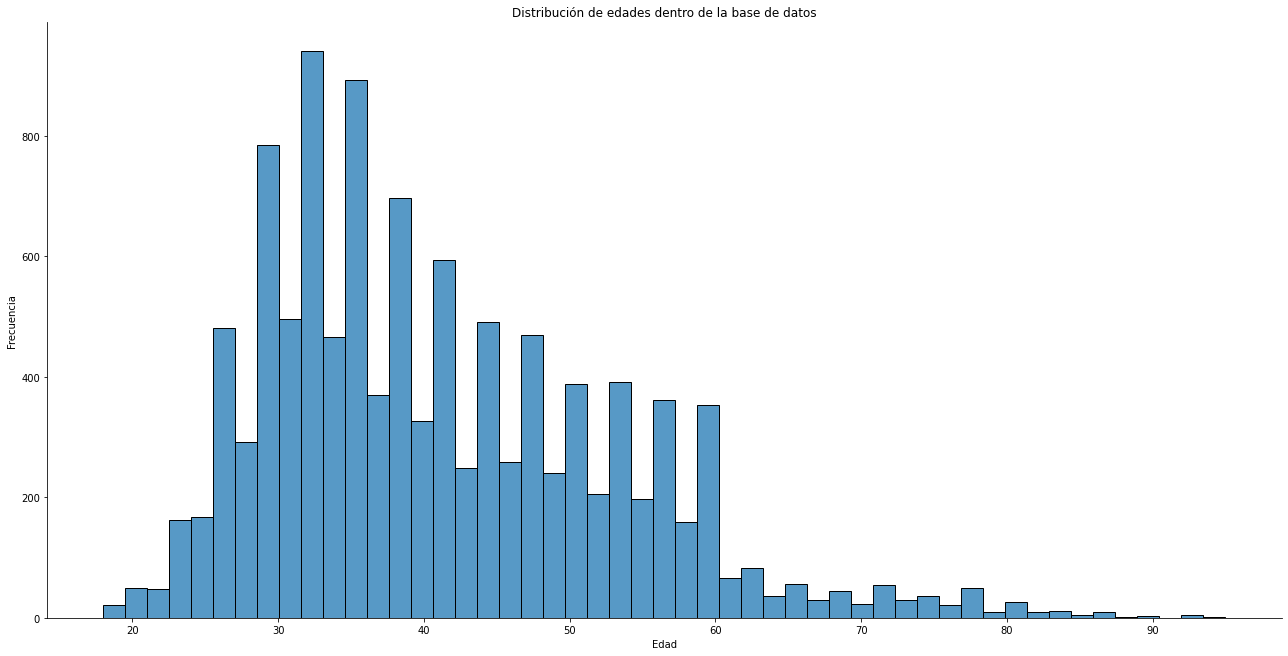

In [ ]:
# Gráfico de la distribución de edades.
sns.displot(df['age'],height=9,aspect=2).set(title= "Distribución de edades dentro de la base de datos", ylabel = "Frecuencia", xlabel = "Edad")
plt.show()

Distribución de las edades de los encuestados, si bien mencionamos las edades anteriormente, es útil remarcar que las edades en su mayoría están entre los 25 a 60 años, lo cual nos parece un público acorde para ser representativo de este análisis.

In [ ]:
# Grupo de edades para poder analizar posteriormente. Formar rangos etarios y poder visualizar mejor la información
# La edad maxima para armar los bins para el box plot.
print(df["age"].max())
# La edad minima para armar los bins para el box plot.
print(df["age"].min())

95
18


In [ ]:
bins = [0,20,30,40,50,96]
labels=["0-20","20-30","30-40","40-50","+50"]

In [ ]:
# Genero grupo de edades
df["Age Category"]= pd.cut(df["age"],bins,labels=labels)
print(df["Age Category"].value_counts(sort= False))
print(df["Age Category"].value_counts(sort= False, normalize = True))

0-20       41
20-30    1966
30-40    4188
40-50    2496
+50      2471
Name: Age Category, dtype: int64
0-20     0.003673
20-30    0.176133
30-40    0.375202
40-50    0.223616
+50      0.221376
Name: Age Category, dtype: float64


In [ ]:
# La variable objetivo es clasificar en base a las caracteristicas si un cliente va a suscribirse o no a un depósito. 
df.groupby('deposit').size()

deposit
no     5873
yes    5289
dtype: int64

In [ ]:
# Filtro del dataset con los clientes que si realizaron depositos para luego poder analizar, graficar, estos mismos clientes que son de nuestro interes.
df_deposit= df["deposit"]=="yes"
df_deposit_yes= df[df_deposit]
df_deposit_yes.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,Age Category
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,+50
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,+50
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,40-50
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,+50
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,+50


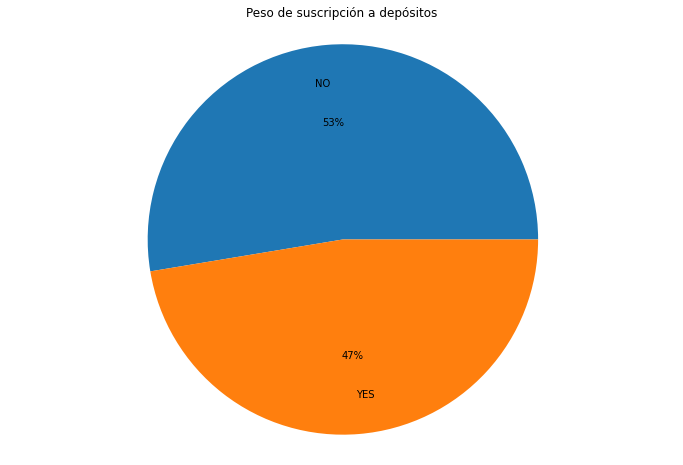

In [ ]:
# Gráfico de torta para ver la proporción de nuestra variable objetivo "Deposit"
fig, ax = plt.subplots(figsize=(12, 8))
labels = ["NO","YES"]
plt.pie(df["deposit"].value_counts(normalize=True).mul(100), autopct='%.0f%%', labels=labels, labeldistance=0.8)
plt.title("Peso de suscripción a depósitos")
plt.axis('equal')
plt.show()


Del total de contactados en todo nuestro dataset, la mayoria no posee un depósito a plazo fijo 53%, pero 47% son las personas que si se suscribieron a un depósito.

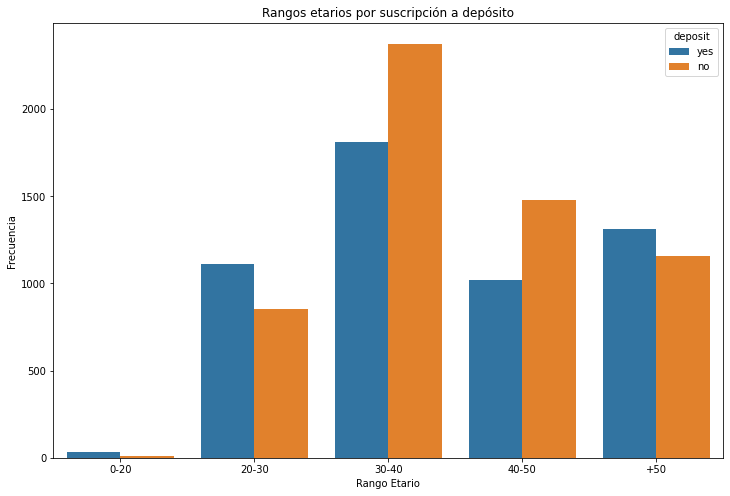

In [ ]:
# Gráfico para ver la distribución por edad en terminos a suscripciones a depósitos
fig, ax = plt.subplots(figsize=(12, 8))
sns.countplot(data=df, x="Age Category", hue="deposit").set(title="Rangos etarios por suscripción a depósito", ylabel= "Frecuencia", xlabel= "Rango Etario")
plt.show()

Hay una mayor concentración de personas entre 30-40 años. A simple vista, no se ve una relación de suscripción de plazos fijos ligada a la edad.

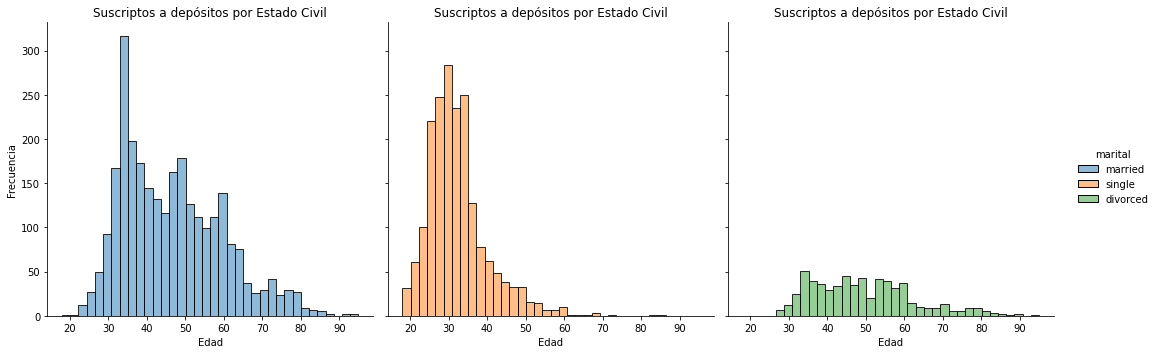

In [ ]:
# Gráfico de distribución filtrado por las personas suscriptas a un depósito, por edad y estado civil
sns.displot(data=df_deposit_yes, x="age", hue="marital", col="marital").set(title = "Suscriptos a depósitos por Estado Civil", ylabel = "Frecuencia", xlabel = "Edad")
plt.show()

Dentro de las personas que se suscribieron a depósitos, las personas casadas son mas propensas a suscribirse a un depósito a plazo. 

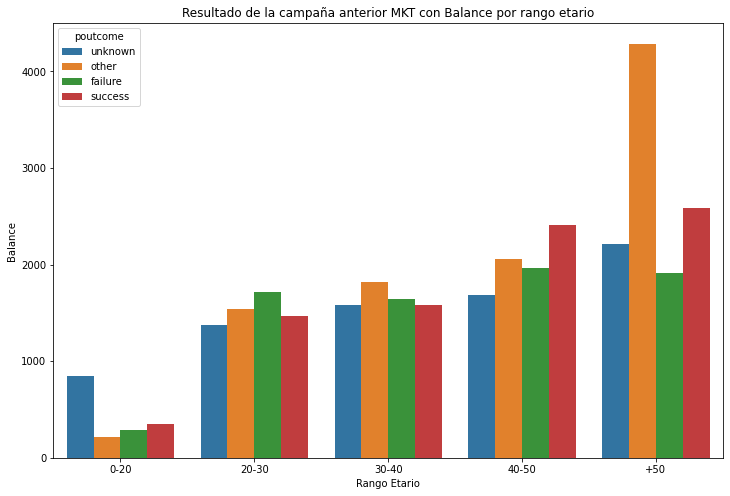

In [ ]:
# En este grafico de barras, se muestra el balance, el rango etario, y como fueron los resultados de las personas que en la campaña anterior de Marketing. 
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x="Age Category", y="balance", data=df_deposit_yes, hue="poutcome", ci=0).set(title="Resultado de la campaña anterior MKT con Balance por rango etario", ylabel = "Balance", xlabel = "Rango Etario")
plt.show()

A medida de que la persona es mayor, como es de esperarse, su balance aumenta. A su vez, a medida que la persona es mayor se nota que el resultado de la anterior campaña fue satisfactoria. 

Mientras que en los grupos mas jovenes (20-30 y 30-40) se ve un ratio de mas fracasos en la campaña sobre casos positivos, esto puede indicar o bien su desinteres o bien la posibilidad de alguna otra alternativa mas moderna de inversión (como por ejemplo: las cryptomonedas, mas adecuadas con ese rango etario).

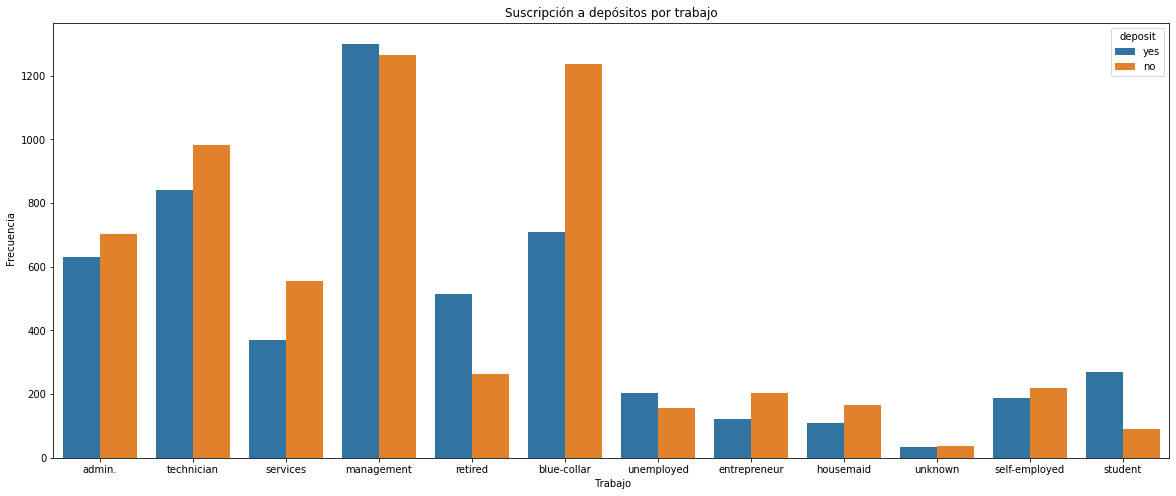

In [ ]:
# Gráfico de los trabajos de las personas y sus suscripciones.
fig, ax = plt.subplots(figsize=(20, 8))
sns.countplot(data=df, x="job", hue="deposit").set(title="Suscripción a depósitos por trabajo", ylabel = " Frecuencia", xlabel = " Trabajo")
plt.show()

In [ ]:
trabajo_balance = df.pivot_table(
    index=["job"],
    values=["balance"],
    columns = ["deposit"],
    aggfunc="count"
).reset_index()#.style.format("{:.2f}")
trabajo_balance["Si/No"] = round((trabajo_balance[("balance","yes")] / trabajo_balance[("balance","no")])*100,2)
#trabajo_balance.sort_values((  'Si/No',    ''),ascending=False)
trabajo_balance

job balance         Si/No
deposit                     no   yes        
0               admin.     703   631   89.76
1          blue-collar    1236   708   57.28
2         entrepreneur     205   123   60.00
3            housemaid     165   109   66.06
4           management    1265  1301  102.85
5              retired     262   516  196.95
6        self-employed     218   187   85.78
7             services     554   369   66.61
8              student      91   269  295.60
9           technician     983   840   85.45
10          unemployed     155   202  130.32
11             unknown      36    34   94.44

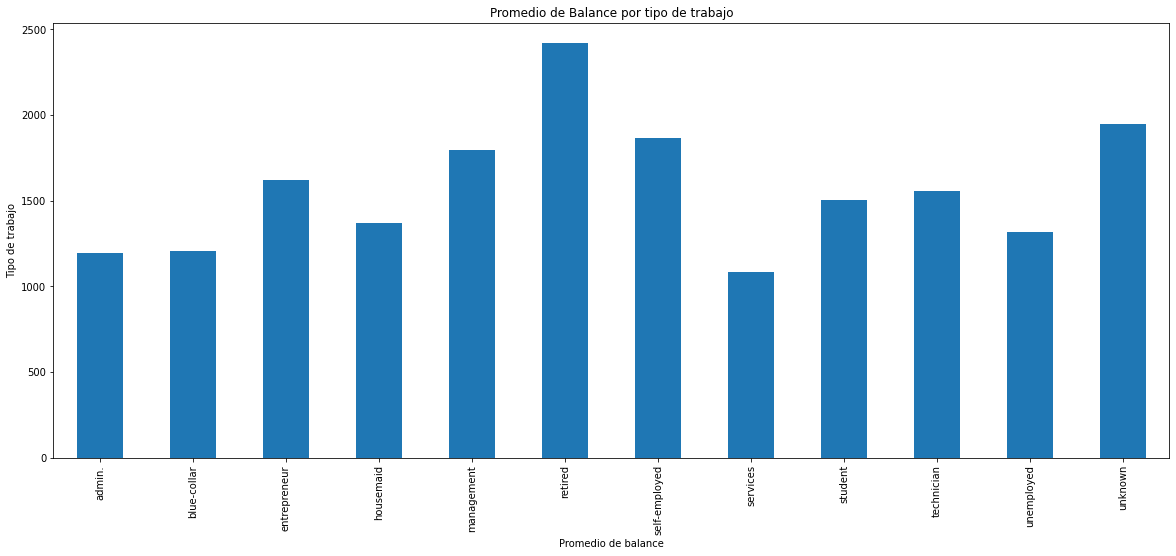

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))
df.groupby("job").mean()["balance"].plot(kind="bar")#.sort_values("balance", ascending=False)
plt.xlabel("Promedio de balance")
plt.ylabel("Tipo de trabajo")
plt.title("Promedio de Balance por tipo de trabajo")
plt.show()

Estos gráficos demuestran la proporción de los depósitos por tipo de trabajo, el balance promedio por tipo de trabajo. Tambien muestran el promedio del balance por tipo de trabajo y la pivot table demuestra que las personas suscriptas a depósitos, como era de esperarse poseen un mayor balance en promedio que las no suscriptas.


En proporción relativa los "estudiantes" son los mas propensos a tener un depósito, los siguen los "retirados" y los "desempleados". Destacando que los retirados tienen un alto balance, mientras que los estudiantes podriamos imaginar que tienen depósitos para pagar luego sus estudios y los desempleados para proteger sus fondos.

Los oficinistas (blue collar), los emprendedores y los que se dedidcan a dar servicios son menos propensos a suscribirse a un depósito. Destacando que los oficinistas y los que dan servicios en promedio son los que menos balance tienen, mientras que los emprendedores probablemente inviertan en sus negocios mas que en un Depósito.




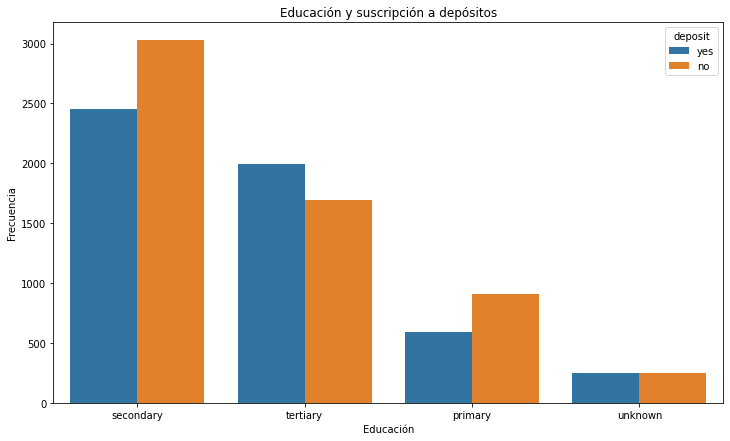

In [ ]:
# Gráfico de la educación maxima de las personas con sus depósitos
fig, ax = plt.subplots(figsize=(12, 7))
sns.countplot(data=df, x="education", hue="deposit").set(title="Educación y suscripción a depósitos", ylabel = "Frecuencia", xlabel= "Educación")
plt.show()

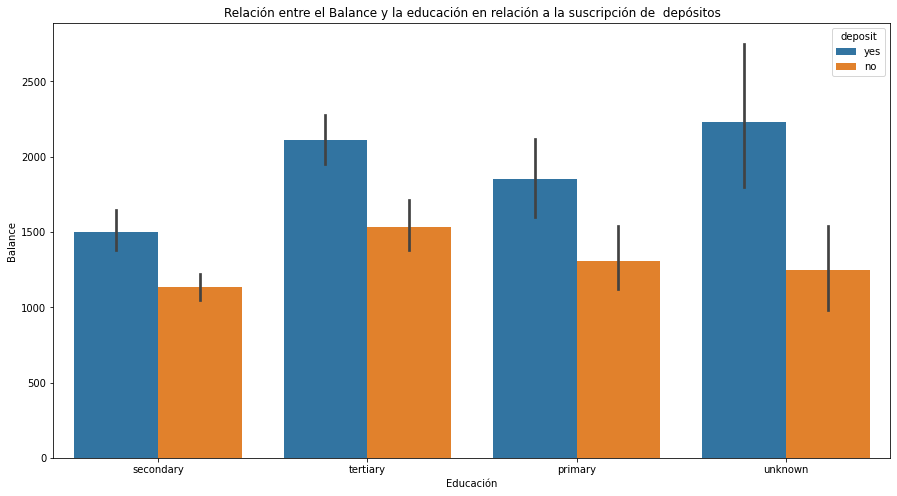

In [ ]:
# Grafico bivariado que relacione education con balance y deposit
fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(x="education", y="balance", data=df, hue = "deposit"). set(xlabel= "Educación", ylabel= "Balance")
plt.title('Relación entre el Balance y la educación en relación a la suscripción de  depósitos')
plt.show()


Estos gráficos caja de bigote, muestran que la gente mas educada y con mayor balance, suelen ser mas propensos a suscribirse a un depósito.

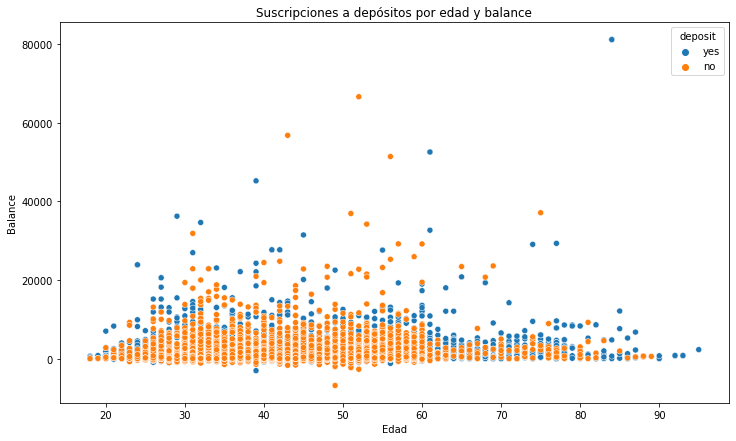

In [ ]:
# Gráfico de dispersion comparanado el balance con la edad, visualizando suscripcion a Depósitos. 
fig, ax = plt.subplots(figsize=(12, 7))
sns.scatterplot(data=df, x="age", y="balance", hue="deposit").set(title="Suscripciones a depósitos por edad y balance", xlabel= "Edad", ylabel= "Balance")
plt.show()

Este gráfico, ilustra que hay relación entre la edad y el balance de las personas, con respecto a la suscripción de un depósito. 

A mayor edad y a mayor balance las personas suelen suscribirse mas a depoósitos que las personas mas jovenes y con menos balance.

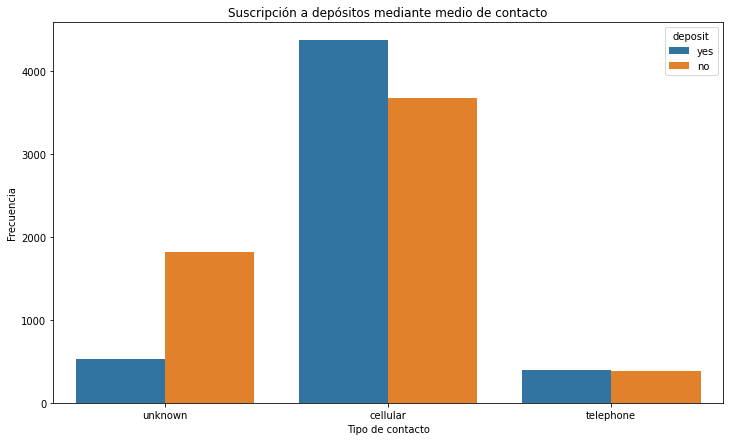

In [ ]:
# Gráfico de barra, visualizando las suscripciones a depósitos en relación con su metodo de contacto. 
fig, ax = plt.subplots(figsize=(12, 7))
plt.ylabel= ("Frecuencia")
sns.countplot(data=df, x="contact", hue="deposit").set(title="Suscripción a depósitos mediante medio de contacto", xlabel= "Tipo de contacto", ylabel= "Frecuencia")
plt.show()

No hay mucha relación al parecer entre los contactos y su efectividad en la campaña, pero se nota una buena performance de conversión a los "Contactados por celular"

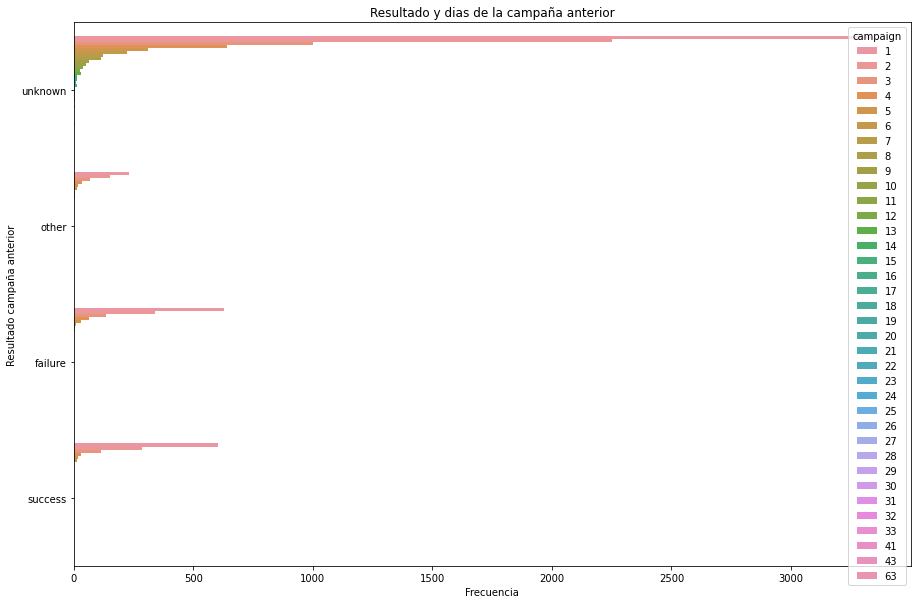

In [ ]:
# Gráfico de barras horizontal, con los resultados de la campaña anterior de Marketing y la cantidad de días de campaña.
fig, ax = plt.subplots(figsize=(15, 10))
sns.countplot(data=df, y="poutcome", hue="campaign").set(title="Resultado y dias de la campaña anterior", xlabel= "Frecuencia", ylabel= "Resultado campaña anterior")

plt.show()

Este gráfico muestra los resultados de la campaña de Marketing anterior, en donde vemos que la tasa de éxito fue mayor que la de fracaso. 

Sin embargo, no queda muy claro, por eso indagaremos debajo para ver si hay alguna relación a que mientras mas dias de campañas fueron dedicados a un cliente mayor la probabilidad de que haya éxito.

In [ ]:
# Filtro para poder visualizar dias de campaña mayor a 5 y sacar los poutcome unknown que nos entorpecen el grafico y no nos dejan comparar correctamente 
#la relacion entre dias de campaña y exito de la campaña.
df_campaign_mas_5 = df[df["campaign"]>5]
df_campaign_mas_5_known = df_campaign_mas_5[df_campaign_mas_5["poutcome"]!="unknown"]


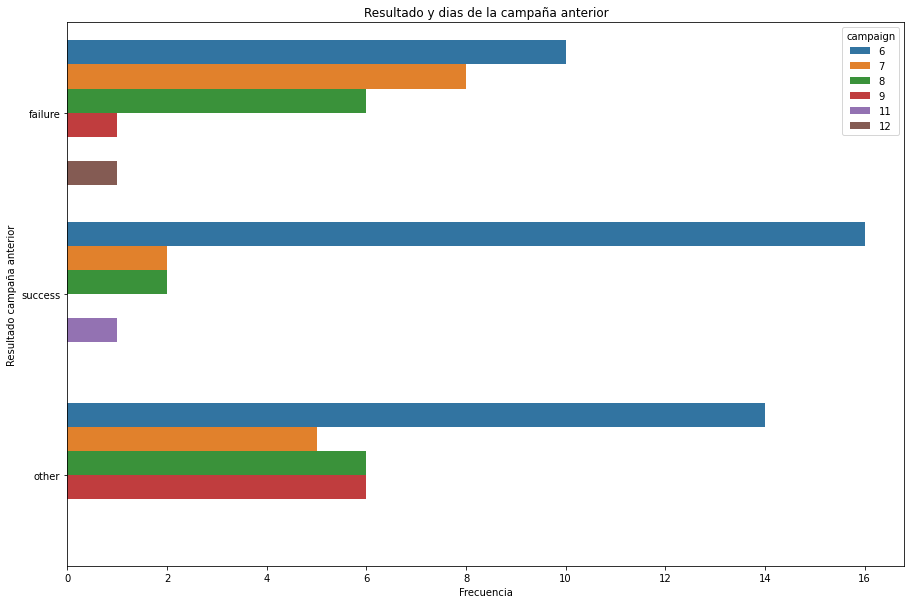

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.countplot(data=df_campaign_mas_5_known, y="poutcome", hue="campaign").set(xlabel= "Frecuencia", ylabel= "Resultado campaña anterior", title="Resultado y dias de la campaña anterior")
plt.show()

No se ve una relación con respecto a que mientras mas dias de campaña sean destinados mayor es la probabilidad de exito a una suscripción al depósito.

In [ ]:
# Filtro el dataset por donde la campaña anterior de MKT anterior fue exitosa para poder realizar un análisis acotado y preciso
df_success= df["poutcome"]=="success"
df_success_s= df[df_success]

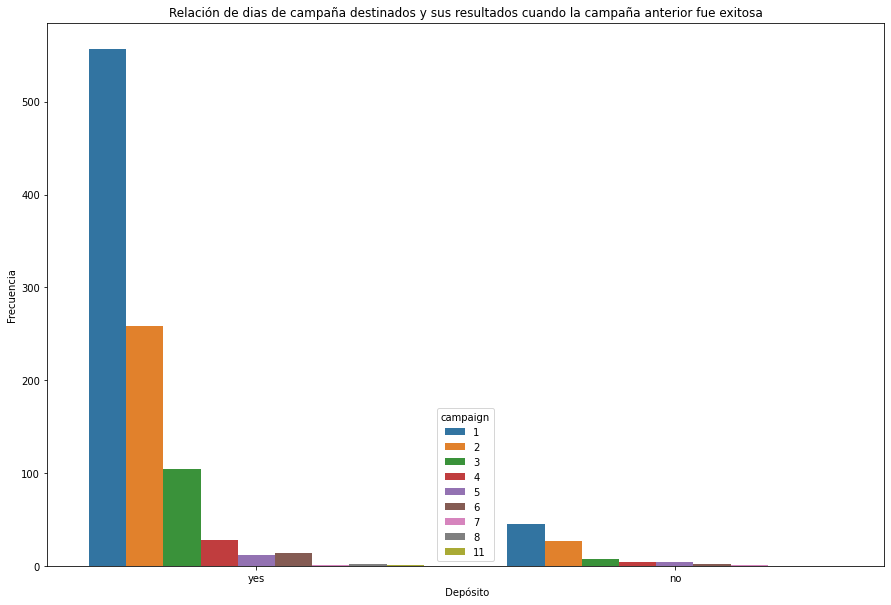

In [ ]:
# Gráfico filtrado por los depósitos exitosos de la campaña anterior.
fig, ax = plt.subplots(figsize=(15, 10))
sns.countplot(data=df_success_s, x="deposit", hue="campaign").set(xlabel =" Depósito", ylabel = "Frecuencia", title="Relación de dias de campaña destinados y sus resultados cuando la campaña anterior fue exitosa")
plt.show()


Esta ilustración muestra, que en la gran mayoria en que los casos que anteriormente fueron exitosos y hayan tenido depósitos, tiene un alto porcentaje de retención de esos clientes. 

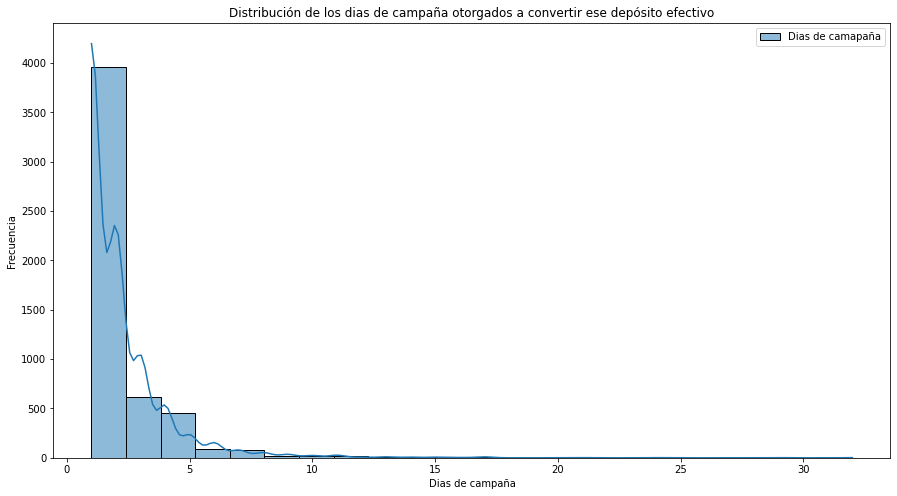

In [ ]:
# Histograma con los dias de campaña destinados a las personas que se suscribieron a un depósito.
plt.figure(figsize=(15,8))

sns.histplot(data=df_deposit_yes,
             x="campaign",
             bins=22,
             kde=True,
             label="Dias de camapaña").set(ylabel="Frecuencia", xlabel="Dias de campaña", title= "Distribución de los dias de campaña otorgados a convertir ese depósito efectivo")



plt.legend()

plt.show();

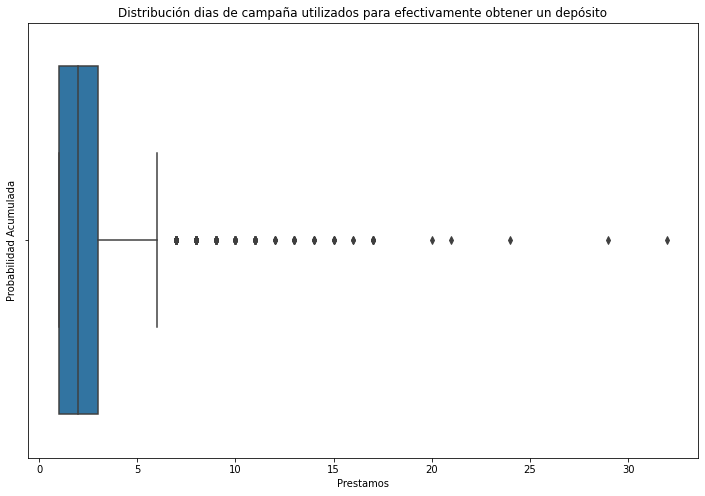

In [ ]:
# Gráfico boxplot de los dias de campaña de los depósitos efectivos.
plt.figure(figsize=(12,8))

sns.boxplot(x="campaign",
            data=df_deposit_yes).set(title = "Distribución dias de campaña utilizados para efectivamente obtener un depósito", xlabel= "Prestamos", ylabel = "Probabilidad Acumulada")

plt.show();

Distribución que muestra los dias de campaña para las personas que efectivamente hicieron un depóstio en el banco. No muestra una gran influencia de los dias de campaña asociados a la conversion de un depósito.

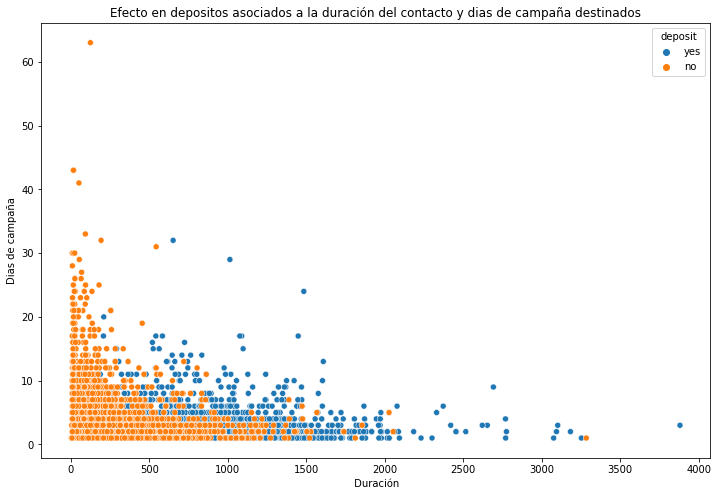

In [ ]:
# Gráfico de dispersion que muestra la relación entre la duración de las llamadas, los dias de campaña y su repercusion en los depósitos.
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x="duration", y="campaign", hue="deposit").set(title="Efecto en depositos asociados a la duración del contacto y dias de campaña destinados", ylabel= "Dias de campaña", xlabel = " Duración")
plt.show()

Este gráfico nos muestra que mientras mas dura la consulta y mientras mas dias de campaña se emplean con el cliente, mas probable que la persona se suscriba a un depósito.

In [ ]:
df.groupby('default').size()

default
no     10994
yes      168
dtype: int64

In [ ]:
df_default = df["default"]=="yes"
df_default_yes= df[df_default]
# otra forma de hacerlo
#df_default_yes = df[df["default"]=="yes"]

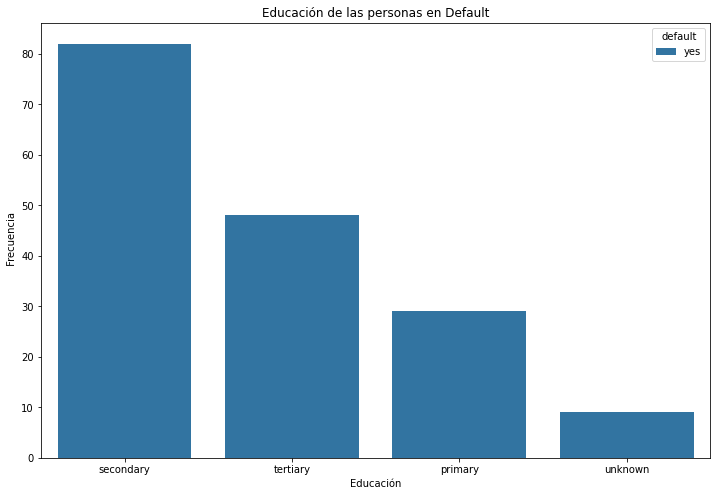

In [ ]:
# Educación con relación al default
plt.figure(figsize=(12,8))
sns.countplot(data=df_default_yes, x="education", hue="default").set(title="Educación de las personas en Default", ylabel = " Frecuencia", xlabel = "Educación")
plt.show()

In [ ]:
round(len(df_default_yes[df_default_yes["education"]=="tertiary"])/len(df_default_yes)*100,2)

28.57

La mayoria de las personas en default generalmente suelen tener menor educación

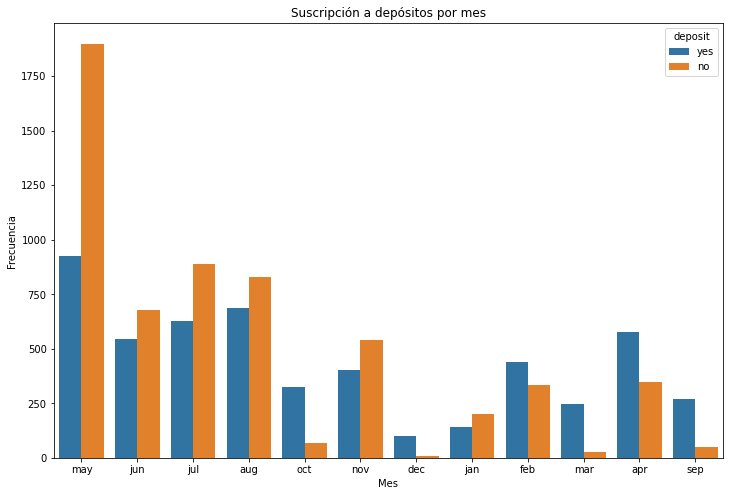

In [ ]:
# Los depositos por mes.
# percentage_efectividad =len(df_deposit_yes)/len(df)
plt.figure(figsize=(12,8))
sns.countplot(data=df, x="month", hue="deposit").set(title="Suscripción a depósitos por mes", ylabel = "Frecuencia", xlabel = "Mes")
plt.show()

In [ ]:
efectividad_mes = df.pivot_table(
    index=["month"],
    columns = ["deposit"],
    values = ["job"],
    aggfunc="count"
).reset_index()
efectividad_mes["Efectividad"] = round((efectividad_mes[("job","yes")] / efectividad_mes[("job","no")])*100,2)

efectividad_mes


month   job      Efectividad
deposit          no  yes            
0         apr   346  577      166.76
1         aug   831  688       82.79
2         dec    10  100     1000.00
3         feb   335  441      131.64
4         jan   202  142       70.30
5         jul   887  627       70.69
6         jun   676  546       80.77
7         mar    28  248      885.71
8         may  1899  925       48.71
9         nov   540  403       74.63
10        oct    69  323      468.12
11        sep    50  269      538.00

Finalmente este gráfico, nos muestra información que identifica los meses en cuando fueron realizados los contactos sabiendo si hubo suscripción o no al depósito.

En Enero, Mayo, Junio, Julio y Agosto vemos que hubo una gran cantidad de contactos pero en su mayoria no exitosos. 

Mientras que en Febrero, Marzo, Abril, Septiembre y Octubre vemos que hubo menos contactos pero que ellos fueron exitosos.

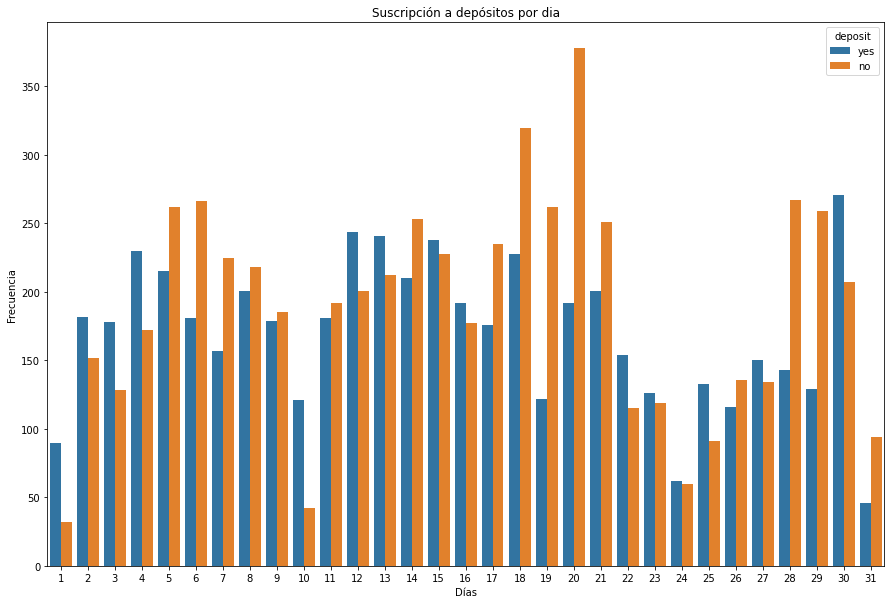

In [ ]:
# Los depositos por dia.
fig, ax = plt.subplots(figsize=(15, 10))
sns.countplot(data=df, x="day", hue="deposit").set(title="Suscripción a depósitos por dia", ylabel= "Frecuencia", xlabel = "Días")
plt.show()

Los depósitos son menos probables de ocurrir a mitad del mes.

#-----------------------------------------------------------------------------------------------------------------------------------------

---

# 12. Modelo de Machine Learning

In [ ]:
# Transformo la variable "deposit", si por 1 y no por 0 para poder analizar y para poder visualizar sus correlaciones
df.deposit.replace(('yes', 'no'), (1, 0), inplace=True)

In [ ]:

df.corr()

,age,balance,day,duration,campaign,pdays,previous,deposit
age,1.000000,0.112300,-0.000762,0.000189,-0.005278,0.002774,0.020169,0.034901
balance,0.112300,1.000000,0.010467,0.022436,-0.013894,0.017411,0.030805,0.081129
day,-0.000762,0.010467,1.000000,-0.018511,0.137007,-0.077232,-0.058981,-0.056326
duration,0.000189,0.022436,-0.018511,1.000000,-0.041557,-0.027392,-0.026716,0.451919
campaign,-0.005278,-0.013894,0.137007,-0.041557,1.000000,-0.102726,-0.049699,-0.128081
pdays,0.002774,0.017411,-0.077232,-0.027392,-0.102726,1.000000,0.507272,0.151593
previous,0.020169,0.030805,-0.058981,-0.026716,-0.049699,0.507272,1.000000,0.139867
deposit,0.034901,0.081129,-0.056326,0.451919,-0.128081,0.151593,0.139867,1.000000


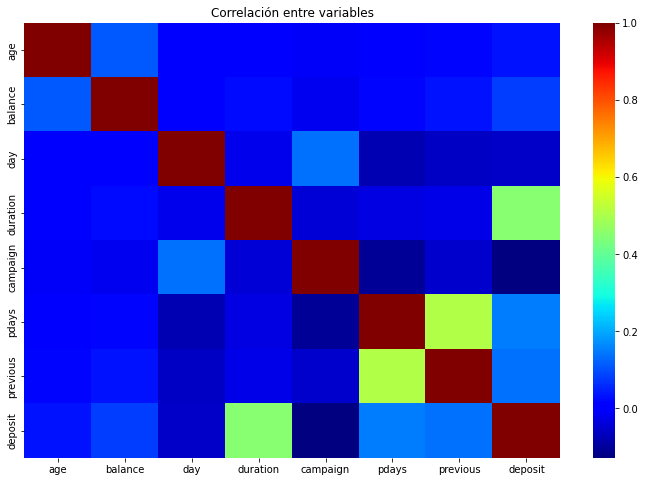

In [ ]:
# Correlación de las variables numéricas.
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='jet').set(title="Correlación entre variables")

plt.show();

Tras haber realizado el EDA, hay ciertas columnas que a mi opinión no tienen mucha importancia para el modelo de clasificación que queremos realizar. Es por ello que nos quedaremos con, obviamente nuesta variable dependiente "deposit", y con "age" - "marital" - "balance" - "job" - "duration" - "education".

In [ ]:
# DataFrame reducido en variables, las cuales son mas importantes.

df[["age", "marital" , "balance" ,"job", "duration" , "education","deposit"]].head() # contact , month, housing, poutcome, campaign

,age,marital,balance,job,duration,education,deposit
0,59,married,2343,admin.,1042,secondary,1
1,56,married,45,admin.,1467,secondary,1
2,41,married,1270,technician,1389,secondary,1
3,55,married,2476,services,579,secondary,1
4,54,married,184,admin.,673,tertiary,1


In [ ]:
print("Cantidad de posibles valores de la variable " +"job= "+  str(df["job"].nunique()))
print("Cantidad de posibles valores de la variable " +"education= "+  str(df["education"].nunique()))
print("Cantidad de posibles valores de la variable " +"marital= "+  str(df["marital"].nunique()))

Cantidad de posibles valores de la variable job= 12
Cantidad de posibles valores de la variable education= 4
Cantidad de posibles valores de la variable marital= 3


De las columnas seleccionadas, hay algunas que son categóricas y es por eso que las transformaremos. En su mayoria, aplicamos One Hot Encoding, a excepción de la variable "job" que cuenta con 12 posibilidades distintas en la cual aplicamos Label Encoding.

In [ ]:
label_encoder = LabelEncoder()
df["job"] = label_encoder.fit_transform(df["job"])

In [ ]:
df["job"].unique()

array([ 0,  9,  7,  4,  5,  1, 10,  2,  3, 11,  6,  8])

In [ ]:
# Creo variables para armar mi módelo de clasificación
x = df[["age", "marital" , "balance" ,"job", "duration" , "education"]]
y = df[["deposit"]]

In [ ]:
# Transformo variables categóricas en dummies
a=x[["age",  "balance" , "duration","job"]]
b= pd.get_dummies(x[["education","marital"]])


x_new = pd.concat([a,b],axis=1)

In [ ]:
x_new.head()

,age,balance,duration,job,education_primary,education_secondary,education_tertiary,education_unknown,marital_divorced,marital_married,marital_single
0,59,2343,1042,0,0,1,0,0,0,1,0
1,56,45,1467,0,0,1,0,0,0,1,0
2,41,1270,1389,9,0,1,0,0,0,1,0
3,55,2476,579,7,0,1,0,0,0,1,0
4,54,184,673,0,0,0,1,0,0,1,0


# 12.1 RANDOM FOREST




In [ ]:
# Entrenaremos el módelo con un 70% de los datos, dejando 30% para chequear su efectividad.

x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.30, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=4, random_state=42)

clf.fit(x_train, y_train)

<ipython-input-64-79e9992c667b>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train, y_train)


RandomForestClassifier(max_depth=4, random_state=42)

In [ ]:
# Obtener predicciones
y_pred = clf.predict(x_test)

In [ ]:
test_accuracy = accuracy_score(y_test, y_pred)

print('% de aciertos sobre el set de evaluación:',round(test_accuracy*100),2)

% de aciertos sobre el set de evaluación: 75 2


#-----------------------------------------------------------------------------------------------------------------------------------------

---

# 12.2 SVM

Pruebo otro módelo de SVM como para evaluar cual de los dos modelos de predicción nos da mejor

In [ ]:
# Creación del modelo SVM 
modelo = SVC(C=0.1,kernel='rbf',random_state=42)
modelo.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.1, random_state=42)

In [ ]:
#Predicciones
y_train_pred = modelo.predict(x_train)
y_test_pred = modelo.predict(x_test)

In [ ]:
test_accuracy = accuracy_score(y_test, y_test_pred)
print('% de aciertos sobre el set de evaluación:',round(test_accuracy*100),2)

% de aciertos sobre el set de evaluación: 70 2


El módelo de Random Forest el accuracy da mejor que el SVM, es por ello que vamos a seguir con el módelo de Random Forest para evaluar sus metricas y mejorar sus parametros e hiperparametros.

#-----------------------------------------------------------------------------------------------------------------------------------------

---

# 13. Evaluación del módelo

A continuación veremos las metricas que evaluan al módelo implementado previamente.

In [ ]:
# Matriz de confusión
confusion_matrix(y_test, y_pred) 


array([[1352,  390],
       [ 436, 1171]])

La matriz de confusión nos muestra los resultados de las predicciones y como las clasificó. 

En el extremo superior izquierdo, tenemos los True positives → (TP), que son los casos en los que el modelo predijo "SI" de manera correcta. 

Debajo en el extremo inferior izquierdo, los False positives ->(FP), en donde el modelo predijo "SI", cuando correspondia "NO". 


En el extremo superior derecho, estan los False Negatives -> (FN), casos en los que el "NO" predicho en realidad pertenecía a la clase "SI". 

Y en el extremo inferior derecho, estan los True Negatives ->(TN) en donde el modelo clasifico correctamente los "NO".

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


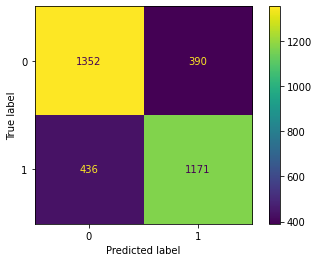

In [ ]:
# Ploteamos la Matriz
fig, ax = plt.subplots(figsize=(12, 8))
plot_confusion_matrix(clf, x_test, y_test)
plt.show()


In [ ]:
test_accuracy = accuracy_score(y_test, y_pred)

print('% de aciertos sobre el set de evaluación:',round(test_accuracy*100),2)

# El accuracy nos da el % total de aciertos del modelo

% de aciertos sobre el set de evaluación: 75 2


In [ ]:
# Precision score
round(precision_score(y_test, y_pred),2) 

# La precisión es el acierto de las prediciones positivas sobre las clasificaciones positivas.

0.75

In [ ]:
# Recall
round(recall_score(y_test, y_pred),2) 

# El recall son todos los casos que tendrían que ser evaluados como "Sí", sobre los "SI" y los Falsos Negativos.

0.73

In [ ]:
# F1 Score

round(f1_score(y_test, y_pred),2) 

# F1 se calcula haciendo la media armónica entre la precisión y la exhaustividad.

0.74

In [ ]:

print(classification_report(y_pred=y_pred, y_true= y_test))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77      1742
           1       0.75      0.73      0.74      1607

    accuracy                           0.75      3349
   macro avg       0.75      0.75      0.75      3349
weighted avg       0.75      0.75      0.75      3349



AUC for our classifier is: 0.8370095456373773


TypeError: ignored

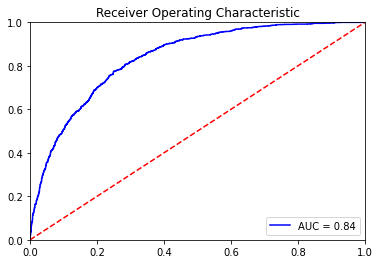

In [ ]:
#Curva ROC

class_probabilities = clf.predict_proba(x_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
fig, ax = plt.subplots(figsize=(12, 8))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# La curva AUC-ROC es una métrica de rendimiento que se utiliza para medir el rendimiento del modelo de clasificación en diferentes valores de umbral.

# PCA

In [ ]:
clf.feature_importances_

array([9.71880288e-02, 6.68102213e-02, 7.37200016e-01, 3.68514100e-02,
       8.11397969e-03, 3.66654393e-03, 2.16785586e-02, 1.03064968e-03,
       7.26032272e-04, 1.10533107e-02, 1.56812487e-02])

In [ ]:
# Aplicamos el PCA para reducir la dimensión de 22 a 2 variables.

pca = PCA(n_components = 2)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [ ]:
# Explicación de la varianza de las componentes
explained_variance = pca.explained_variance_ratio_
explained_variance

#El primer componente explica el 98,6% de la variabilidad de mis datos.

array([0.98855209, 0.01143355])

-----------------------------

# 14. Mejora del módelo

In [ ]:
# Hypertuning utilizando grid search cross validation
random_forest = RandomForestClassifier() #Instanciamos el modelo
#Definimos los parámetros de búsqueda
#Por default y con un score de 75,2 tenemos n_estimator = 100, criterion="gini", max_depth="None", min_samples_split = 2,  min_samples_leaf = 1, max_features is sqrt(n_features)
params = {
    'n_estimators' : [20,40,50,70,100,200],
    'max_depth':[None,2,10,50,200],
    'max_features': [None,0.1,0.2,0.4,0.5,0.6,0.7,0.8,0.9,1], # Leyendo articulos vi que es uno de los hiperparametros mas importantes, por eso tanta prueba.
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,5,10]
}

grid_random_forest = GridSearchCV(estimator = random_forest,
                                  param_grid = params,
                                  scoring = 'accuracy', 
                                  cv = 5, 
                                  verbose = 1, #Muestra el resultado en pantalla
                                  n_jobs = -1) # corrida en paralelo
                                  

In [ ]:
%%time
#Entrenamos el modelo
grid_random_forest.fit(x_train, y_train)

Fitting 5 folds for each of 3240 candidates, totalling 16200 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10800 fits failed out of a total of 16200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10800 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.8/dist-packages/joblib/parall

CPU times: user 1min 3s, sys: 6.54 s, total: 1min 9s
Wall time: 1h 26min 2s


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 10, 50, 200],
                         'max_features': [None, 2, 4, 5, 10, 25],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [20, 40, 50, 70, 100, 200]},
             scoring='accuracy', verbose=1)

In [ ]:
# grid_random_forest.cv_results_
pd.DataFrame(grid_random_forest.cv_results_).sort_values("rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2277,1.899607,0.015890,0.029129,0.000696,entropy,10,None,1,5,70,"{'criterion': 'entropy', 'max_depth': 10, 'max...",0.731286,0.731926,0.738964,0.734315,0.733035,0.733905,0.002731,1
2273,5.455976,0.054719,0.080646,0.002106,entropy,10,None,1,2,200,"{'criterion': 'entropy', 'max_depth': 10, 'max...",0.730006,0.734485,0.733845,0.730474,0.736876,0.733137,0.002576,2
2333,5.491916,0.074662,0.085718,0.002970,entropy,10,2,1,5,200,"{'criterion': 'entropy', 'max_depth': 10, 'max...",0.727447,0.732566,0.735125,0.730474,0.739437,0.733010,0.004083,3
2299,1.061840,0.016876,0.018119,0.000679,entropy,10,None,5,10,40,"{'criterion': 'entropy', 'max_depth': 10, 'max...",0.736404,0.733205,0.731926,0.724712,0.737516,0.732753,0.004507,4
2269,1.094396,0.008051,0.022295,0.008904,entropy,10,None,1,2,40,"{'criterion': 'entropy', 'max_depth': 10, 'max...",0.733845,0.733205,0.735765,0.729193,0.731754,0.732753,0.002197,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1405,0.027066,0.000194,0.000000,0.000000,gini,200,4,1,2,40,"{'criterion': 'gini', 'max_depth': 200, 'max_f...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,3236
1406,0.032557,0.000537,0.000000,0.000000,gini,200,4,1,2,50,"{'criterion': 'gini', 'max_depth': 200, 'max_f...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,3237
1407,0.044145,0.001925,0.000000,0.000000,gini,200,4,1,2,70,"{'criterion': 'gini', 'max_depth': 200, 'max_f...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,3238
1281,0.048165,0.001687,0.000000,0.000000,gini,50,25,10,2,70,"{'criterion': 'gini', 'max_depth': 50, 'max_fe...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,3239


In [ ]:
#Obtenemos el mejor modelo
grid_random_forest.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=10, max_features=None,
                       min_samples_split=5, n_estimators=70)

In [ ]:
grid_random_forest.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 70}

In [ ]:
random_forest_nuevo = RandomForestClassifier(criterion='entropy',max_depth=10, max_features= None, n_estimators=70,  min_samples_leaf= 1, min_samples_split= 5) #Instanciamos el modelo

In [ ]:
random_forest_nuevo.fit(x_train,y_train)

<ipython-input-95-3ff7c8c717fd>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_nuevo.fit(x_train,y_train)


RandomForestClassifier(criterion='entropy', max_depth=10, max_features=None,
                       min_samples_split=5, n_estimators=70)

In [ ]:
# Obtener predicciones
y_pred = random_forest_nuevo.predict(x_test)

In [ ]:
#Calculo el accuracy en Test
from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(y_test, y_pred)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.739026575097044


# STRATIFIED K FOLD

In [ ]:
# librerias
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# crear el procedimiento loocv 
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
skf.get_n_splits(x, y)

5

In [ ]:
from sklearn.metrics import accuracy_score
# Modelo vacio
model = RandomForestClassifier(criterion='gini',max_depth=5, max_features= 2, n_estimators=40) 
# Lista para guardar accuracy
list_ac=[]
for i in range(0,skf.get_n_splits(x, y)):
  # Calculo de indices
  train, test = list(skf.split(x, y))[i]
  # Separar train y test
  x_train_n, y_train_n, x_test_n, y_test_n= x_train, y_train, x_test,y_test  
  # Ajustar el modelo
  model.fit(x_train_n, y_train_n)
  # Predicciones
  pred= model.predict(x_test_n)
  # Calculo del error
  accuracy= accuracy_score(y_true=y_test_n, y_pred= pred)
  print('Iteracion: ',i+1, ' Accuracy:', accuracy)
  list_ac.append(accuracy)
# Promedio de accuracy
import numpy as np
print('Accuracy promedio:', np.mean(list_ac))

<ipython-input-100-0d9c43fe60ef>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train_n, y_train_n)


Iteracion:  1  Accuracy: 0.7384293819050463


<ipython-input-100-0d9c43fe60ef>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train_n, y_train_n)


Iteracion:  2  Accuracy: 0.7387279785010451


<ipython-input-100-0d9c43fe60ef>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train_n, y_train_n)


Iteracion:  3  Accuracy: 0.7396237682890415


<ipython-input-100-0d9c43fe60ef>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train_n, y_train_n)


Iteracion:  4  Accuracy: 0.7396237682890415


<ipython-input-100-0d9c43fe60ef>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train_n, y_train_n)


Iteracion:  5  Accuracy: 0.7393251716930427
Accuracy promedio: 0.7391460137354434
